Gnerate two graphs of most volatile stocks of the period for both up and down.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import os
import datetime
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
from tqdm import tqdm
import pickle
import time
import math
from collections import Counter
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
# how many previous trading days to compare in the graph
REPORT_PERIOD = 1

In [ ]:
def get_dataframe(stock, anaysis_period = 365):
    # A huge epoch that allows most up to date info
    current_epoch = 3000000000
    past_epoch = int((dt.now() - datetime.timedelta(anaysis_period)).timestamp())
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={past_epoch}&period2={current_epoch}&interval=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

In [ ]:
def get_change():
    report_dic = {}
    with open("/content/drive/MyDrive/Investment_Analysis/stock_df.txt", "rb") as f:
        stock_df = pickle.loads(f.read())

    for symbol in stock_df:
        try:
            df = stock_df[symbol]
            change = ((df.Close - df.shift(REPORT_PERIOD).Close) / df.shift(REPORT_PERIOD).Close).to_list()[-1]
            report_dic[symbol] = change
        except Exception as e:
            print(e)

    return report_dic

In [ ]:
report_dic = get_change()

In [ ]:
class change_pair:
    def __init__(self, stock, change):
        self.stock = stock
        self.change = change
    def __cmp__(self, other):
        if self.change == other.change:
            return 0
        elif self.change > other.change:
            return 1
        else:
            return -1

    def __eq__(self, other):
        return self.change == other.change

    def __ne__(self, other):
        return self.change != other.change

    def __lt__(self, other):
        return self.change < other.change

    def __le__(self, other):
        return self.change <= other.change

    def __gt__(self, other):
        return self.change > other.change

    def __ge__(self, other):
        return self.change >= other.change

pos_changes_pairs = []
neg_changes_pairs = []
for k in report_dic:
    if not math.isnan(report_dic[k]):
        if report_dic[k] > 0:
            pos_changes_pairs.append(change_pair(k, report_dic[k]))
        else:
            neg_changes_pairs.append(change_pair(k, report_dic[k]))




In [ ]:
pos_change_list = []
neg_change_list = []

for pair in pos_changes_pairs:
    for i in range(int(pair.change * 1000)):
        pos_change_list.append(pair.stock)
for pair in neg_changes_pairs:
    for i in range(int(-pair.change * 1000)):
        neg_change_list.append(pair.stock)

In [ ]:
def show_plot(word_list):
    counter = Counter(word_list)
    cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(counter)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
changes = []
for stock in report_dic:
    if math.isnan(report_dic[stock]):
        continue
    changes.append(report_dic[stock])

changes = sorted(changes)

median_change = changes[len(changes)//2]
print(f"The median change is {median_change}%")

The median change is 0.0039040713887339815%


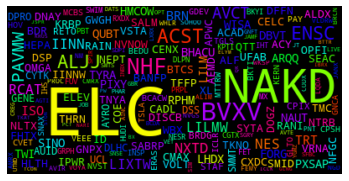

In [ ]:
show_plot(pos_change_list)

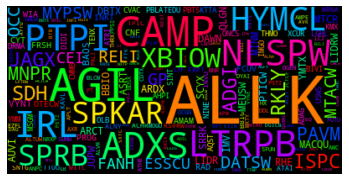

In [ ]:
show_plot(neg_change_list)